

---


# **Combination of Dataframes and ML prediction**
#### ***Look before you Leap : Leveraging Predictive Models to Improve Automotive Safety and Travel Time***



---



**Final Project**
CSCI 35300/79502   |   Fall 2020 

##### Hannah Do







In [1]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random

import datetime, string, re
import sys, os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from collections import Counter

print('All Libraries Sucessfully Imported')

All Libraries Sucessfully Imported


In [2]:
! pip install imbalanced-learn


In [3]:
import imblearn
print(imblearn.__version__)

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from numpy import where

0.7.0


---
### Merging dataframes - traffic + tweet
- Importing previously saved csv files

In [4]:
file_1mo = ['locat_11a', 'locat_11b']
file_3mo = ['locat_9a', 'locat_9b', 'locat_10a', 'locat_10b', 'locat_11a', 'locat_11b']
file_6mo = ['locat_6a', 'locat_6b', 'locat_7a', 'locat_7b', 'locat_8a', 'locat_9a', 'locat_9b', 'locat_10a', 'locat_10b', 'locat_11a', 'locat_11b']


In [44]:
tweet = pd.DataFrame()

# for f in file_1mo:
# for f in file_1mo:
for f in file_1mo:
    
    file = pd.read_csv('locat/' +f + '.csv')

    file = file.drop(columns = ['Unnamed: 0'], axis=1)

    file['longitude'] = file['longitude'].apply(lambda x: float(x))
    file['latitude'] = file['latitude'].apply(lambda x: float(x))

    file = file[file['latitude'] > 40.5]
    file = file[file['latitude'] < 41]
    file = file[file['longitude'] < -73]
    file = file[file['longitude'] > -75]

    file = file.reset_index(drop=True)
    
    tweet = tweet.append(file)


tweet = tweet.reset_index(drop=True)
tweet


,original tweet,neutral score,polar score,trimmed tweet,latitude,longitude
0,Cleared: Incident on #NY156,0.682,0.1027,cleared incident new york 156,40.702568,-74.01145
1,Incident on #I287 SB at North of Exit 1 - US 1...,1.000,0.0000,incident i287 south bound route h exit 1 us 1 ...,40.714550,-74.00714
2,Cleared: Incident on #NJ17 NB from I-80 to Pas...,0.865,0.1027,cleared incident new jersey 17 route h bound 8...,40.860340,-74.12374
3,Updated: Incident on #NY32 at Sweet Road https...,0.700,0.4588,updated incident new york 32 sweet road https ...,40.714550,-74.00714
4,Incident on #ALine at Aqueduct - N Conduit Av ...,1.000,0.0000,incident aline aqueduct n conduit av https co ...,40.668180,-73.83918
...,...,...,...,...,...,...
20009,Cleared: Construction on #NY19 NB from Beadle ...,0.865,0.1027,cleared construction new york 19 route h bound...,40.714550,-74.00714
20010,Cleared: Construction on #NY18 WB from Wiler R...,0.887,0.1027,cleared construction new york 18 west bound wi...,40.714550,-74.00714
20011,Cleared: Incident on #StatenIslandRailway NB f...,0.865,0.1027,cleared incident staten island rail way route ...,40.644550,-74.08014
20012,Cleared: Construction on #NY77 NB at Broadway;...,0.851,0.1027,cleared construction new york 77 route h bound...,40.868736,-73.91793


In [45]:
traffic = pd.read_csv("data_traffic/accident_1mo.csv", index_col= None, header = None)
# data_traffic/accident_1mo.csv
# data_traffic/accident_6mo.csv

traffic = traffic.drop([0], axis=1)
# drop NaN column with index values

traffic.columns = traffic.iloc[0]
traffic = traffic[1:] 
# make first row as column names
    
traffic

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
1,2020-11-30,1:10,STATEN ISLAND,10305,40.59742,-74.06836,"(40.59742, -74.06836)",MCCLEAN AVENUE,WALLACE AVENUE,0,...,0,0,0,0,0,Unspecified,NaN,4371841,Sedan,NaN
2,2020-11-29,11:55,NaN,NaN,40.844955,-73.93008,"(40.844955, -73.93008)",HARLEM RIVER DRIVE,NaN,0,...,0,0,0,0,0,Unsafe Speed,NaN,4371752,Sedan,NaN
3,2020-11-28,18:00,QUEENS,11420,40.677505,-73.81786,"(40.677505, -73.81786)",115 AVENUE,121 STREET,2,...,0,0,0,2,0,Driver Inattention/Distraction,Unspecified,4371339,Taxi,Sedan
4,2020-11-28,7:45,NaN,NaN,40.72948,-73.9721,"(40.72948, -73.9721)",FDR DRIVE,NaN,0,...,0,0,0,0,0,Brakes Defective,NaN,4371325,Sedan,NaN
5,2020-11-27,9:27,NaN,NaN,40.669857,-73.95051,"(40.669857, -73.95051)",NOSTRAND AVENUE,NaN,1,...,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,4371303,Sedan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7904,2020-11-07,9:08,BRONX,10452,40.838383,-73.91902,"(40.838383, -73.91902)",JEROME AVENUE,EAST CLARKE PLACE,0,...,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,4365629,Taxi,Sedan
7905,2020-11-08,0:01,QUEENS,11354,40.76407,-73.80914,"(40.76407, -73.80914)",156 STREET,NORTHERN BOULEVARD,0,...,0,0,0,0,0,Aggressive Driving/Road Rage,NaN,4365395,Sedan,NaN
7906,2020-11-09,23:20,BROOKLYN,11238,40.67329,-73.95703,"(40.67329, -73.95703)",FRANKLIN AVENUE,STERLING PLACE,3,...,0,0,0,3,0,Driver Inattention/Distraction,Unspecified,4366610,Sedan,Sedan
7907,2020-11-24,13:30,QUEENS,11433,40.704185,-73.78599,"(40.704185, -73.78599)",172 STREET,LIBERTY AVENUE,0,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4370790,PK,Sedan


In [46]:
traffic = traffic.dropna(subset=['LONGITUDE', 'LATITUDE'])

traffic['LONGITUDE'] = traffic['LONGITUDE'].apply(lambda x: float(x))
traffic['LATITUDE'] = traffic['LATITUDE'].apply(lambda x: float(x))

traffic = traffic[traffic['LATITUDE'] > 40.5]
traffic = traffic[traffic['LATITUDE'] < 41]
traffic = traffic[traffic['LONGITUDE'] < -73]
traffic = traffic[traffic['LONGITUDE'] > -75]

traffic = traffic.reset_index(drop=True)


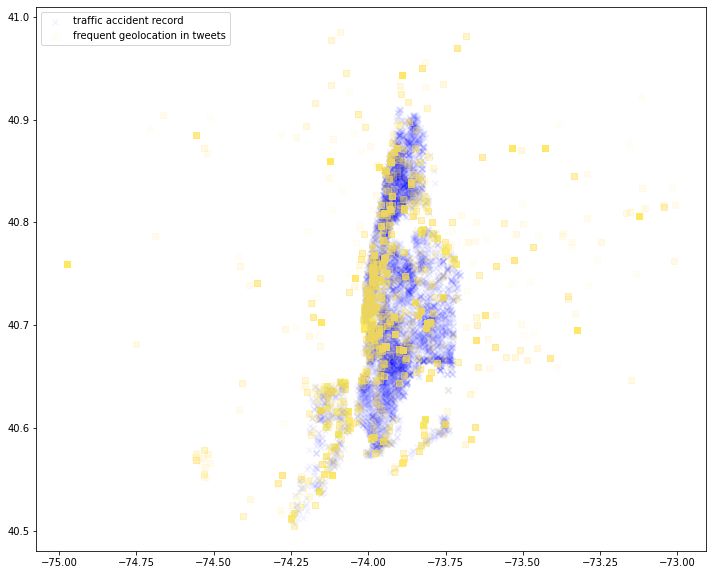

In [55]:
# visualizing the similarity between accident record and twitter geolocations

import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

plt.scatter(traffic['LONGITUDE'],traffic['LATITUDE'], c='b', alpha=0.05, marker='x', label='traffic accident record')

plt.scatter(tweet['longitude'], tweet['latitude'], c='#FFE760', alpha=0.05, marker='s', label='frequent geolocation in tweets')

plt.legend(loc='upper left')
plt.show()



In [117]:

freq2 = pd.DataFrame()
freq2 = tweet.groupby(["longitude", "latitude"]).size().reset_index(name="Frequency")
freq2 = freq2.sort_values('Frequency', ascending=False)

freq2.drop(freq2.head(1).index,inplace=True)
# most frequent value is the default value that returns location of 'new york'

freq2[['polar score', 'neutral score']] = tweet[['polar score', 'neutral score']]

freq2 = freq2.reset_index(drop=True)

freq2


,longitude,latitude,Frequency,polar score,neutral score
0,-73.829990,40.714000,1027,0.1027,0.896
1,-73.942940,40.849800,847,0.0000,1.000
2,-73.990360,40.692450,601,0.0000,1.000
3,-74.080140,40.644550,418,0.0000,1.000
4,-73.758644,40.727500,364,0.0000,1.000
...,...,...,...,...,...
2976,-74.010120,40.732970,1,0.0000,1.000
2977,-74.010120,40.679710,1,0.0000,1.000
2978,-73.900710,40.825530,1,0.0000,1.000
2979,-74.010160,40.724987,1,0.0000,1.000


#### Bottleneck point --> merging the two datasets based on distance between lat, long values
- takes quite a time

In [118]:
traffic['distance'] = 10000
traffic['severity'] = 0.000
traffic['polar sentiment'] = 0.000
traffic['neutral sentiment'] = 0.000

for i in range(len(traffic['LONGITUDE'])-1):
    for j in range(len(freq2['longitude'])-1):
        x = (np.sqrt(((traffic['LONGITUDE'][i+1]-freq2['longitude'][j+1])*100000)**2 + ((traffic['LATITUDE'][i+1]-freq2['latitude'][j+1])*100000)**2))
        if (x < 2000):
            traffic['severity'][i+1] += 1
            
            if (traffic['polar sentiment'][i+1]) == 0:
                traffic['polar sentiment'][i+1] = freq2['polar score'][j+1]
                traffic['neutral sentiment'][i+1] = freq2['neutral score'][j+1]
            else:
                traffic['polar sentiment'][i+1] = (traffic['polar sentiment'][i+1]+freq2['polar score'][j+1])/2
                traffic['neutral sentiment'][i+1] = (traffic['neutral sentiment'][i+1]+freq2['neutral score'][j+1])/2
            
            if (traffic['distance'][i+1] > x):
                traffic['distance'][i+1] = x
            else:
                pass
        else:
            pass


<ipython-input-118-a61412443b98>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic['severity'][i+1] += 1
<ipython-input-118-a61412443b98>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic['polar sentiment'][i+1] = freq2['polar score'][j+1]
<ipython-input-118-a61412443b98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic['neutral sentiment'][i+1] = freq2['neutral score'][j+1]
<ipython-input-118-a61412443b98>:20:

In [119]:
traffic.to_csv("merged/combined_3mo.csv", mode = 'a')

# combined_1mo
# combined_3mo
# combined_6mo

In [120]:
traffic

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,distance,severity,polar sentiment,neutral sentiment
0,2020-11-30,1:10,STATEN ISLAND,10305,40.597420,-74.068360,"(40.59742, -74.06836)",MCCLEAN AVENUE,WALLACE AVENUE,0,...,0,Unspecified,NaN,4371841,Sedan,NaN,10000,0,0,0
1,2020-11-29,11:55,NaN,NaN,40.844955,-73.930080,"(40.844955, -73.93008)",HARLEM RIVER DRIVE,NaN,0,...,0,Unsafe Speed,NaN,4371752,Sedan,NaN,206,59,0,1
2,2020-11-28,18:00,QUEENS,11420,40.677505,-73.817860,"(40.677505, -73.81786)",115 AVENUE,121 STREET,2,...,0,Driver Inattention/Distraction,Unspecified,4371339,Taxi,Sedan,1027,9,0,1
3,2020-11-28,7:45,NaN,NaN,40.729480,-73.972100,"(40.72948, -73.9721)",FDR DRIVE,NaN,0,...,0,Brakes Defective,NaN,4371325,Sedan,NaN,61,105,0,1
4,2020-11-27,9:27,NaN,NaN,40.669857,-73.950510,"(40.669857, -73.95051)",NOSTRAND AVENUE,NaN,1,...,0,Failure to Yield Right-of-Way,NaN,4371303,Sedan,NaN,281,84,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25505,2020-09-16,16:00,NaN,NaN,40.746200,-73.735630,"(40.7462, -73.73563)",CROSS ISLAND PARKWAY,NaN,1,...,0,Following Too Closely,Unspecified,4349242,Sedan,Sedan,700,12,0,1
25506,2020-10-09,3:39,BROOKLYN,11224,40.576405,-73.993390,"(40.576405, -73.99339)",NaN,NaN,0,...,0,Driver Inattention/Distraction,Unspecified,4356510,Sedan,NaN,869,34,0,1
25507,2020-09-18,11:55,BROOKLYN,11211,40.711422,-73.959540,"(40.711422, -73.95954)",SOUTH 3 STREET,ROEBLING STREET,0,...,0,Driver Inattention/Distraction,Unspecified,4349316,Sedan,Box Truck,285,78,0,1
25508,2020-10-03,20:54,BROOKLYN,11212,40.670790,-73.903275,"(40.67079, -73.903275)",PITKIN AVENUE,JUNIUS STREET,1,...,0,Failure to Yield Right-of-Way,Unspecified,4354356,Bike,NaN,385,52,0,0


---

### Random sampling (SMOTE) due to class imbalance
- we currently only have accident (1) instances, which is why we will create non-accident instances (0) through random sampling

In [80]:
temp = pd.read_csv("merged/combined_1mo.csv", sep=',')

# merged/combined_1mo.csv
# merged/combined_3mo.csv
# merged/combined_6mo.csv

temp = temp.drop(columns = ['Unnamed: 0'], axis=1)
# drop NaN column with index values

temp

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,distance,severity,polar sentiment,neutral sentiment
0,2020-11-30,1:10,STATEN ISLAND,10305.0,40.597420,-74.06836,"(40.59742, -74.06836)",MCCLEAN AVENUE,WALLACE AVENUE,0,...,0,Unspecified,NaN,4371841,Sedan,NaN,10000,0,0,0
1,2020-11-29,11:55,NaN,NaN,40.844955,-73.93008,"(40.844955, -73.93008)",HARLEM RIVER DRIVE,NaN,0,...,0,Unsafe Speed,NaN,4371752,Sedan,NaN,206,42,0,1
2,2020-11-28,18:00,QUEENS,11420.0,40.677505,-73.81786,"(40.677505, -73.81786)",115 AVENUE,121 STREET,2,...,0,Driver Inattention/Distraction,Unspecified,4371339,Taxi,Sedan,1346,4,0,1
3,2020-11-28,7:45,NaN,NaN,40.729480,-73.97210,"(40.72948, -73.9721)",FDR DRIVE,NaN,0,...,0,Brakes Defective,NaN,4371325,Sedan,NaN,61,52,0,0
4,2020-11-27,9:27,NaN,NaN,40.669857,-73.95051,"(40.669857, -73.95051)",NOSTRAND AVENUE,NaN,1,...,0,Failure to Yield Right-of-Way,NaN,4371303,Sedan,NaN,333,55,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,2020-11-07,9:08,BRONX,10452.0,40.838383,-73.91902,"(40.838383, -73.91902)",JEROME AVENUE,EAST CLARKE PLACE,0,...,0,Failure to Yield Right-of-Way,Unspecified,4365629,Taxi,Sedan,476,25,0,1
7899,2020-11-08,0:01,QUEENS,11354.0,40.764070,-73.80914,"(40.76407, -73.80914)",156 STREET,NORTHERN BOULEVARD,0,...,0,Aggressive Driving/Road Rage,NaN,4365395,Sedan,NaN,190,6,0,1
7900,2020-11-09,23:20,BROOKLYN,11238.0,40.673290,-73.95703,"(40.67329, -73.95703)",FRANKLIN AVENUE,STERLING PLACE,3,...,0,Driver Inattention/Distraction,Unspecified,4366610,Sedan,Sedan,154,53,0,0
7901,2020-11-24,13:30,QUEENS,11433.0,40.704185,-73.78599,"(40.704185, -73.78599)",172 STREET,LIBERTY AVENUE,0,...,0,Driver Inattention/Distraction,Unspecified,4370790,PK,Sedan,452,11,0,1


In [81]:
temp['target'] = 1
temp

# adding target value to the existing accident dataset

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,distance,severity,polar sentiment,neutral sentiment,target
0,2020-11-30,1:10,STATEN ISLAND,10305.0,40.597420,-74.06836,"(40.59742, -74.06836)",MCCLEAN AVENUE,WALLACE AVENUE,0,...,Unspecified,NaN,4371841,Sedan,NaN,10000,0,0,0,1
1,2020-11-29,11:55,NaN,NaN,40.844955,-73.93008,"(40.844955, -73.93008)",HARLEM RIVER DRIVE,NaN,0,...,Unsafe Speed,NaN,4371752,Sedan,NaN,206,42,0,1,1
2,2020-11-28,18:00,QUEENS,11420.0,40.677505,-73.81786,"(40.677505, -73.81786)",115 AVENUE,121 STREET,2,...,Driver Inattention/Distraction,Unspecified,4371339,Taxi,Sedan,1346,4,0,1,1
3,2020-11-28,7:45,NaN,NaN,40.729480,-73.97210,"(40.72948, -73.9721)",FDR DRIVE,NaN,0,...,Brakes Defective,NaN,4371325,Sedan,NaN,61,52,0,0,1
4,2020-11-27,9:27,NaN,NaN,40.669857,-73.95051,"(40.669857, -73.95051)",NOSTRAND AVENUE,NaN,1,...,Failure to Yield Right-of-Way,NaN,4371303,Sedan,NaN,333,55,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,2020-11-07,9:08,BRONX,10452.0,40.838383,-73.91902,"(40.838383, -73.91902)",JEROME AVENUE,EAST CLARKE PLACE,0,...,Failure to Yield Right-of-Way,Unspecified,4365629,Taxi,Sedan,476,25,0,1,1
7899,2020-11-08,0:01,QUEENS,11354.0,40.764070,-73.80914,"(40.76407, -73.80914)",156 STREET,NORTHERN BOULEVARD,0,...,Aggressive Driving/Road Rage,NaN,4365395,Sedan,NaN,190,6,0,1,1
7900,2020-11-09,23:20,BROOKLYN,11238.0,40.673290,-73.95703,"(40.67329, -73.95703)",FRANKLIN AVENUE,STERLING PLACE,3,...,Driver Inattention/Distraction,Unspecified,4366610,Sedan,Sedan,154,53,0,0,1
7901,2020-11-24,13:30,QUEENS,11433.0,40.704185,-73.78599,"(40.704185, -73.78599)",172 STREET,LIBERTY AVENUE,0,...,Driver Inattention/Distraction,Unspecified,4370790,PK,Sedan,452,11,0,1,1


In [82]:
counter = Counter(temp['target'])
counter

Counter({1: 7903})

In [83]:

temp['CRASH TIME'] = temp['CRASH TIME'].apply(lambda q: q.replace(":", ""))
temp['CRASH TIME'] = temp['CRASH TIME'].apply(lambda q: int(q))

# dropping values that are unnecessary or would lead to long dummy values
temp.drop(columns = ['CRASH DATE', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2','polar sentiment', 'BOROUGH', 'ON STREET NAME', 'ZIP CODE', 'LOCATION', 'CROSS STREET NAME'], inplace=True )

pd.get_dummies(temp)

temp

,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,distance,severity,neutral sentiment,target
0,110,40.597420,-74.06836,0,0,0,0,0,0,0,0,4371841,10000,0,0,1
1,1155,40.844955,-73.93008,0,0,0,0,0,0,0,0,4371752,206,42,1,1
2,1800,40.677505,-73.81786,2,0,0,0,0,0,2,0,4371339,1346,4,1,1
3,745,40.729480,-73.97210,0,0,0,0,0,0,0,0,4371325,61,52,0,1
4,927,40.669857,-73.95051,1,0,1,0,0,0,0,0,4371303,333,55,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,908,40.838383,-73.91902,0,0,0,0,0,0,0,0,4365629,476,25,1,1
7899,1,40.764070,-73.80914,0,0,0,0,0,0,0,0,4365395,190,6,1,1
7900,2320,40.673290,-73.95703,3,0,0,0,0,0,3,0,4366610,154,53,0,1
7901,1330,40.704185,-73.78599,0,0,0,0,0,0,0,0,4370790,452,11,1,1


In [84]:
temp2 = pd.DataFrame()
temp2 = temp

temp2


,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,distance,severity,neutral sentiment,target
0,110,40.597420,-74.06836,0,0,0,0,0,0,0,0,4371841,10000,0,0,1
1,1155,40.844955,-73.93008,0,0,0,0,0,0,0,0,4371752,206,42,1,1
2,1800,40.677505,-73.81786,2,0,0,0,0,0,2,0,4371339,1346,4,1,1
3,745,40.729480,-73.97210,0,0,0,0,0,0,0,0,4371325,61,52,0,1
4,927,40.669857,-73.95051,1,0,1,0,0,0,0,0,4371303,333,55,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,908,40.838383,-73.91902,0,0,0,0,0,0,0,0,4365629,476,25,1,1
7899,1,40.764070,-73.80914,0,0,0,0,0,0,0,0,4365395,190,6,1,1
7900,2320,40.673290,-73.95703,3,0,0,0,0,0,3,0,4366610,154,53,0,1
7901,1330,40.704185,-73.78599,0,0,0,0,0,0,0,0,4370790,452,11,1,1


---
- Initial negative samples created (small amount)

In [85]:
# randomizing negative samples with limits - x is # of days per dataframe

x = 30
# x = 60
# x = 90

timelist = [random.randrange(0, 2359, 1) for i in range(x)]

long = [random.uniform(-75, -73) for i in range(x)]
lat = [random.uniform(40.5, 41) for i in range(x)]

per_inj = [random.randint(0, 1) for i in range(x)]
per_kill = [random.randint(0, 1) for i in range(x)]
ped_inj = [random.randint(0, 1) for i in range(x)]
ped_kill = [random.randint(0, 1) for i in range(x)]
cyc_inj = [random.randint(0, 1) for i in range(x)]
cyc_kill = [random.randint(0, 1) for i in range(x)]
mot_inj = [random.randint(0, 1) for i in range(x)]
mot_kill = [random.randint(0, 1) for i in range(x)]
per_inj = [random.randint(0, 1) for i in range(x)]

collision_id =  [4300000 + random.randint(0, 30000) for i in range(x)]
distance = [random.randint(0, 10000) for i in range(x)]
severity = [random.randint(0, 70) for i in range(x)]
neutral = [random.randint(0, 1) for i in range(x)]
target = 0

df2 = pd.DataFrame({"CRASH TIME": timelist,
                    "LATITUDE": lat,
                    "LONGITUDE": long,
                    "NUMBER OF PERSONS INJURED": per_inj,
                    "NUMBER OF PERSONS KILLED": per_kill,
                    "NUMBER OF PEDESTRIANS INJURED": ped_inj,
                    "NUMBER OF PEDESTRIANS KILLED": ped_kill,
                    "NUMBER OF CYCLIST INJURED": cyc_inj,
                    "NUMBER OF CYCLIST KILLED": cyc_kill,
                    "NUMBER OF MOTORIST INJURED": mot_inj,
                    "NUMBER OF MOTORIST KILLED": mot_kill,
                    "COLLISION_ID": collision_id,
                    "distance": distance,
                    "severity": severity,
                    "target": target,
                    "neutral sentiment": neutral
                   }) 

temp2 = temp2.append(df2)
temp2 = temp2.reset_index(drop=True)

temp2 = temp2.dropna()
temp2


,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,distance,severity,neutral sentiment,target
0,110,40.597420,-74.068360,0,0,0,0,0,0,0,0,4371841,10000,0,0,1
1,1155,40.844955,-73.930080,0,0,0,0,0,0,0,0,4371752,206,42,1,1
2,1800,40.677505,-73.817860,2,0,0,0,0,0,2,0,4371339,1346,4,1,1
3,745,40.729480,-73.972100,0,0,0,0,0,0,0,0,4371325,61,52,0,1
4,927,40.669857,-73.950510,1,0,1,0,0,0,0,0,4371303,333,55,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7928,2213,40.989132,-74.457029,0,0,0,0,1,0,1,0,4300757,6064,13,0,0
7929,174,40.846330,-74.008501,1,0,1,1,0,0,0,0,4325301,1892,25,0,0
7930,1265,40.823457,-73.269819,1,0,0,1,0,1,0,0,4321237,3550,0,0,0
7931,429,40.992812,-73.336137,1,0,0,1,0,0,1,0,4320773,4903,48,0,0


<AxesSubplot:xlabel='target', ylabel='count'>

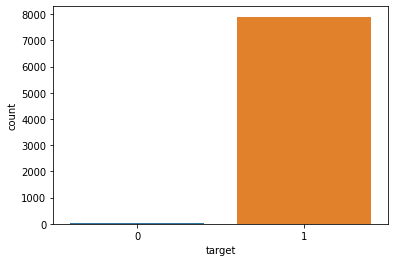

In [86]:
# temp2['target']
sns.countplot(temp2['target'])

---
- SMOTE method used to adjust class imbalance

In [87]:
oversample = SMOTE()
X, y = oversample.fit_resample(temp2, temp2['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

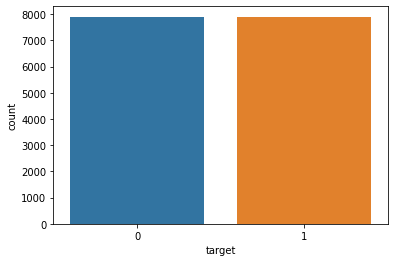

In [88]:

#Oversampling the data
smote = SMOTE(random_state = 101)
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X)
sns.countplot(df_oversampler['target'])

In [89]:
df_oversampler

,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,distance,severity,neutral sentiment,target
0,110,40.597420,-74.068360,0,0,0,0,0,0,0,0,4371841,10000,0,0,1
1,1155,40.844955,-73.930080,0,0,0,0,0,0,0,0,4371752,206,42,1,1
2,1800,40.677505,-73.817860,2,0,0,0,0,0,2,0,4371339,1346,4,1,1
3,745,40.729480,-73.972100,0,0,0,0,0,0,0,0,4371325,61,52,0,1
4,927,40.669857,-73.950510,1,0,1,0,0,0,0,0,4371303,333,55,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15801,800,40.786579,-73.172123,0,0,0,0,0,0,0,0,4323273,5180,40,0,0
15802,776,40.836608,-73.491971,0,0,0,0,0,0,0,0,4326103,3871,54,0,0
15803,1607,40.615447,-73.507553,0,0,1,0,0,0,0,0,4308086,1599,11,1,0
15804,1263,40.631011,-74.418509,1,0,1,0,0,0,0,0,4323550,499,58,0,0


In [90]:
df_oversampler.to_csv('processed_1mo_smote.csv', mode='a')

---
- **MORE negative samples created (large amount)**
- twice or three times the length of df_oversampler columns

In [92]:
# randomizing negative samples with limits - x is # of days per dataframe

realistic_3mo = pd.DataFrame()
realistic_3mo = df_oversampler

x = 30000
# default value set to 2*len(df_oversampler['target'])

timelist = [random.randrange(0, 2359, 1) for i in range(x)]

long = [random.uniform(-75, -73) for i in range(x)]
lat = [random.uniform(40.5, 41) for i in range(x)]

per_inj = [random.randint(0, 1) for i in range(x)]
per_kill = [random.randint(0, 1) for i in range(x)]
ped_inj = [random.randint(0, 1) for i in range(x)]
ped_kill = [random.randint(0, 1) for i in range(x)]
cyc_inj = [random.randint(0, 1) for i in range(x)]
cyc_kill = [random.randint(0, 1) for i in range(x)]
mot_inj = [random.randint(0, 1) for i in range(x)]
mot_kill = [random.randint(0, 1) for i in range(x)]
per_inj = [random.randint(0, 1) for i in range(x)]

collision_id =  [4300000 + random.randint(0, 30000) for i in range(x)]
distance = [random.randint(0, 10000) for i in range(x)]
severity = [random.randint(0, 70) for i in range(x)]
neutral = [random.randint(0, 1) for i in range(x)]
target = 0

neg_addition = pd.DataFrame({"CRASH TIME": timelist,
                    "LATITUDE": lat,
                    "LONGITUDE": long,
                    "NUMBER OF PERSONS INJURED": per_inj,
                    "NUMBER OF PERSONS KILLED": per_kill,
                    "NUMBER OF PEDESTRIANS INJURED": ped_inj,
                    "NUMBER OF PEDESTRIANS KILLED": ped_kill,
                    "NUMBER OF CYCLIST INJURED": cyc_inj,
                    "NUMBER OF CYCLIST KILLED": cyc_kill,
                    "NUMBER OF MOTORIST INJURED": mot_inj,
                    "NUMBER OF MOTORIST KILLED": mot_kill,
                    "COLLISION_ID": collision_id,
                    "distance": distance,
                    "severity": severity,
                    "target": target,
                    "neutral sentiment": neutral
                   }) 

realistic_3mo = realistic_3mo.append(neg_addition)
realistic_3mo = realistic_3mo.reset_index(drop=True)

# realistic_3mo = realistic_3mo.dropna()
realistic_3mo


,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,distance,severity,neutral sentiment,target
0,110,40.597420,-74.068360,0,0,0,0,0,0,0,0,4371841,10000,0,0,1
1,1155,40.844955,-73.930080,0,0,0,0,0,0,0,0,4371752,206,42,1,1
2,1800,40.677505,-73.817860,2,0,0,0,0,0,2,0,4371339,1346,4,1,1
3,745,40.729480,-73.972100,0,0,0,0,0,0,0,0,4371325,61,52,0,1
4,927,40.669857,-73.950510,1,0,1,0,0,0,0,0,4371303,333,55,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45801,186,40.802572,-74.727949,1,0,0,1,0,0,0,1,4307887,2105,69,1,0
45802,1743,40.509119,-74.823392,1,1,0,0,0,0,0,1,4329561,4667,52,0,0
45803,1454,40.656815,-74.527216,0,0,0,1,0,0,0,0,4306125,9641,20,0,0
45804,2330,40.659709,-74.843963,0,0,0,1,0,0,1,0,4320021,1368,22,0,0


<AxesSubplot:xlabel='target', ylabel='count'>

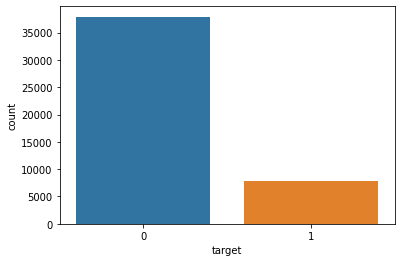

In [93]:

#Oversampling the data
smote = SMOTE(random_state = 101)
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X)
sns.countplot(realistic_3mo['target'])

In [94]:
realistic_3mo.to_csv('processed_1mo_realistic.csv', mode='a')